In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities=[]
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates: 
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities: 
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bc6f506ff5dca100aaa4720cae404b2f


In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Instead of using two for loops, we can use the enumerate() method as an alternative way to 
# iterate through the list of cities and retrieve both the index, and the city from the list.***
# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 1
    # Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.***
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | casper
Processing Record 2 of Set 1 | satun
Processing Record 3 of Set 1 | sassandra
Processing Record 4 of Set 1 | wageningen
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | la crosse
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | zhigansk
Processing Record 9 of Set 1 | baker city
Processing Record 10 of Set 1 | nishihara
Processing Record 11 of Set 1 | seydi
Processing Record 12 of Set 1 | melita
Processing Record 13 of Set 1 | acapulco
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | busca
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | ambon
Processing Record 21 of Set 1 | mareeba
Processing Record 22 of Set 1 | ilulissat
Processing Record 23 of Set 1 | ayagoz
Processi

Processing Record 39 of Set 4 | alofi
Processing Record 40 of Set 4 | buraydah
Processing Record 41 of Set 4 | samusu
City not found. Skipping...
Processing Record 42 of Set 4 | weatherford
Processing Record 43 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 44 of Set 4 | torbay
Processing Record 45 of Set 4 | koumac
Processing Record 46 of Set 4 | la roche-sur-yon
Processing Record 47 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 48 of Set 4 | sangar
Processing Record 49 of Set 4 | makakilo city
Processing Record 50 of Set 4 | camopi
Processing Record 1 of Set 5 | vanavara
Processing Record 2 of Set 5 | peterhead
Processing Record 3 of Set 5 | omsukchan
Processing Record 4 of Set 5 | sorong
Processing Record 5 of Set 5 | luganville
Processing Record 6 of Set 5 | sao joao da barra
Processing Record 7 of Set 5 | cherskiy
Processing Record 8 of Set 5 | kodinsk
Processing Record 9 of Set 5 | atar
Processing Record 10 of Set 5 | barrow
Proc

Processing Record 26 of Set 8 | floro
Processing Record 27 of Set 8 | bismarck
Processing Record 28 of Set 8 | les escoumins
Processing Record 29 of Set 8 | norman wells
Processing Record 30 of Set 8 | husavik
Processing Record 31 of Set 8 | la plata
Processing Record 32 of Set 8 | almansa
Processing Record 33 of Set 8 | khatanga
Processing Record 34 of Set 8 | pacifica
Processing Record 35 of Set 8 | narsaq
Processing Record 36 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 37 of Set 8 | benalla
Processing Record 38 of Set 8 | brunswick
Processing Record 39 of Set 8 | bridlington
Processing Record 40 of Set 8 | iracoubo
Processing Record 41 of Set 8 | sobolevo
Processing Record 42 of Set 8 | sharlyk
Processing Record 43 of Set 8 | conceicao do araguaia
Processing Record 44 of Set 8 | os
City not found. Skipping...
Processing Record 45 of Set 8 | faya
Processing Record 46 of Set 8 | wanning
Processing Record 47 of Set 8 | buala
Processing Record 48 of Set 8 | ulaango

Processing Record 11 of Set 12 | harper
Processing Record 12 of Set 12 | mumford
Processing Record 13 of Set 12 | sioux lookout
Processing Record 14 of Set 12 | dodge city
Processing Record 15 of Set 12 | khanu woralaksaburi
Processing Record 16 of Set 12 | nordfjordeid
Processing Record 17 of Set 12 | comodoro rivadavia
Processing Record 18 of Set 12 | raja sansi
Processing Record 19 of Set 12 | salinopolis
Processing Record 20 of Set 12 | olinda
Processing Record 21 of Set 12 | baghdad
Processing Record 22 of Set 12 | hammerfest
Processing Record 23 of Set 12 | sitges
Processing Record 24 of Set 12 | mayo
Processing Record 25 of Set 12 | puerto leguizamo
Processing Record 26 of Set 12 | port-gentil
Processing Record 27 of Set 12 | maciuca
City not found. Skipping...
Processing Record 28 of Set 12 | ixtapa
Processing Record 29 of Set 12 | bonthe
Processing Record 30 of Set 12 | inuvik
Processing Record 31 of Set 12 | newark
Processing Record 32 of Set 12 | dandong
Processing Record 33

In [12]:
len(city_data)

581

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Casper,42.8666,-106.3131,46.00,53,1,37.98,US,2021-01-13 20:58:52
1,Satun,6.8333,100.0000,78.80,100,75,4.38,TH,2021-01-13 21:02:21
2,Sassandra,4.9500,-6.0833,77.34,87,85,7.92,CI,2021-01-13 21:02:21
3,Wageningen,51.9667,5.6667,41.00,100,90,5.75,NL,2021-01-13 21:02:21
4,Mataura,-46.1927,168.8643,59.00,94,0,10.00,NZ,2021-01-13 21:02:21
5,La Crosse,43.8014,-91.2396,39.20,70,40,3.44,US,2021-01-13 21:02:21
6,Hermanus,-34.4187,19.2345,71.01,81,30,11.01,ZA,2021-01-13 21:02:21
7,Zhigansk,66.7697,123.3711,-41.49,80,100,12.30,RU,2021-01-13 21:02:21
8,Baker City,44.7749,-117.8344,46.40,46,1,14.97,US,2021-01-13 21:02:21
9,Nishihara,26.1842,127.7558,59.00,50,75,5.75,JP,2021-01-13 21:02:21


In [29]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Casper,US,2021-01-13 20:58:52,42.8666,-106.3131,46.00,53,1,37.98
1,Satun,TH,2021-01-13 21:02:21,6.8333,100.0000,78.80,100,75,4.38
2,Sassandra,CI,2021-01-13 21:02:21,4.9500,-6.0833,77.34,87,85,7.92
3,Wageningen,NL,2021-01-13 21:02:21,51.9667,5.6667,41.00,100,90,5.75
4,Mataura,NZ,2021-01-13 21:02:21,-46.1927,168.8643,59.00,94,0,10.00
...,...,...,...,...,...,...,...,...,...
576,Murray Bridge,AU,2021-01-13 21:03:03,-35.1167,139.2667,55.99,92,29,1.99
577,Nome,US,2021-01-13 21:03:03,64.5011,-165.4064,17.60,93,90,5.75
578,Balabac,PH,2021-01-13 21:03:03,7.9868,117.0645,80.01,81,100,10.98
579,Esna,EG,2021-01-13 21:03:03,25.2934,32.5540,64.40,36,0,5.75


In [30]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [31]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

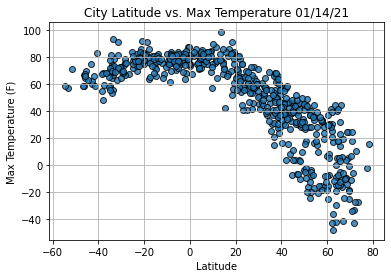

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

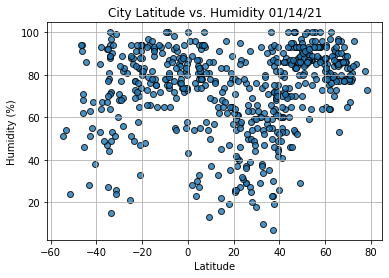

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

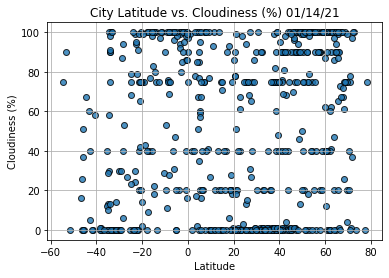

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

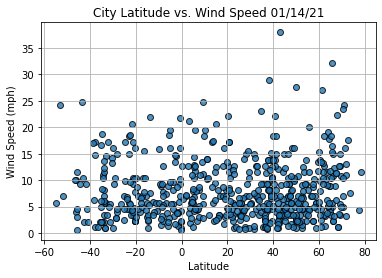

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()